In [131]:
##Importing the necessary libraries
import pandas as pd
import numpy as np

In [132]:
##Importing the Tesla dataset
df = pd.read_csv('TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3602,2024-10-21,218.899994,220.479996,215.729996,218.850006,218.850006,47329000
3603,2024-10-22,217.309998,218.220001,215.259995,217.970001,217.970001,43268700
3604,2024-10-23,217.130005,218.720001,212.110001,213.649994,213.649994,80938900
3605,2024-10-24,244.679993,262.119995,242.649994,260.480011,260.480011,204491900


In [133]:
##Extracting the close column
df1 = df.reset_index()['Close']

In [134]:
##Checking the length
df1.shape

(3607,)

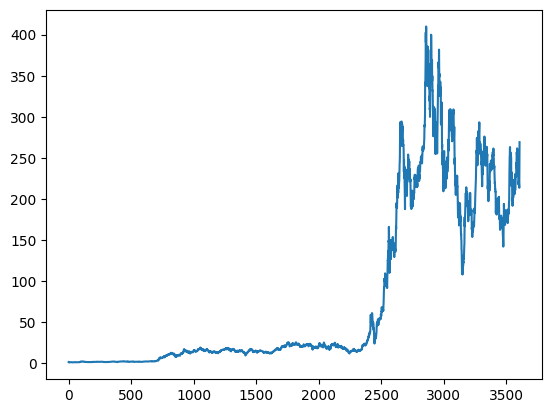

In [135]:
##Plotting the data
import matplotlib.pyplot as plt
plt.plot(df1)

### Scaling the data

In [136]:
##Scaling the data because LSTM is sensitive to the scale of the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
df1 = sc.fit_transform(np.array(df1).reshape(-1,1))

In [137]:
df1.shape

(3607, 1)

In [138]:
df1

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.51990216],
       [0.63442432],
       [0.65572448]])

In [139]:
##Splitting the data
train_size = int(len(df1) * 0.7)
test_size = len(df1) - train_size
train_data, test_data = df1[0: train_size,:], df1[train_size:len(df1),:1]

In [140]:
train_data.shape

(2524, 1)

In [141]:
test_data.shape

(1083, 1)

In [142]:
##Converting an array to matrix function
def create_matrix(df, time_step = 1):
    X, y = [], []
    for i in range(len(df) - time_step -1):
        a = df[i: (i+time_step), 0]
        X.append(a)
        y.append(df[i+time_step, 0])
    return np.array(X), np.array(y)

In [143]:
##Reshaping the data
time_step = 100
X_train, y_train = create_matrix(train_data, time_step)
X_test, y_test = create_matrix(test_data, time_step)

In [144]:
print(X_train.shape), print(y_train.shape)

(2423, 100)
(2423,)


(None, None)

In [145]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

### Creating an LSTM model

In [146]:
##Creating the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [147]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

c:\Users\Ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [148]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [149]:
##Training the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, batch_size=64, verbose=1)

Epoch 1/100


38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 5.9025e-04 - val_loss: 0.0046
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 4.1901e-05 - val_loss: 0.0051
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 3.1200e-05 - val_loss: 0.0071
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 2.6929e-05 - val_loss: 0.0040
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 2.9906e-05 - val_loss: 0.0063
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 2.5803e-05 - val_loss: 0.0092
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 2.4801e-05 - val_loss: 0.0054
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 2.1892e-05 - val_loss: 0.0231
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 2.3410e-05 - val_loss: 0.0129
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 2.9157e-05 - val_loss: 0.0116
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 1.6615e-05 - val_loss: 0.0031
Epoch 12/100
38/38 ━

In [150]:
##Predictions
train_predict = model.predict(X_train)
train_predict

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


array([[0.00251545],
       [0.00255939],
       [0.00274314],
       ...,
       [0.18845356],
       [0.20167856],
       [0.22838435]], dtype=float32)

In [151]:
##Test Predictions
test_predict = model.predict(X_test)
test_predict

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[0.5280897 ],
       [0.5078753 ],
       [0.5191241 ],
       [0.51078844],
       [0.5333958 ],
       [0.545491  ],
       [0.5851571 ],
       [0.59586406],
       [0.5425061 ],
       [0.55121386],
       [0.5442675 ],
       [0.57355124],
       [0.5732299 ],
       [0.55655056],
       [0.5855816 ],
       [0.63099223],
       [0.5851449 ],
       [0.5580404 ],
       [0.56686455],
       [0.59187496],
       [0.59860647],
       [0.59803784],
       [0.62576514],
       [0.63994193],
       [0.66147655],
       [0.666029  ],
       [0.6841519 ],
       [0.749226  ],
       [0.8224085 ],
       [0.7461162 ],
       [0.7618899 ],
       [0.7820591 ],
       [0.77652764],
       [0.75520974],
       [0.7770335 ],
       [0.7917782 ],
       [0.7844175 ],
       [0.78151345],
       [0.8191222 ],
       [0.823891  ],
       [0.79370975],
       [0.7540688 ],
       [0.70754504],
       [0.7687555 ],
       [0.8240069 ],
       [0.7987503 ],
       [0.77719706],
       [0.777

In [152]:
##Revserse scaling the train and test predict
train_predict = sc.inverse_transform(train_predict)
test_predict = sc.inverse_transform(test_predict)

In [153]:
##Calculating the root mean squared error
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_train, train_predict))
print(rmse)

18.777476833265904


In [154]:
##Test RMSE
rmse = math.sqrt(mean_squared_error(y_test, test_predict))
print(rmse)

277.3430750112251


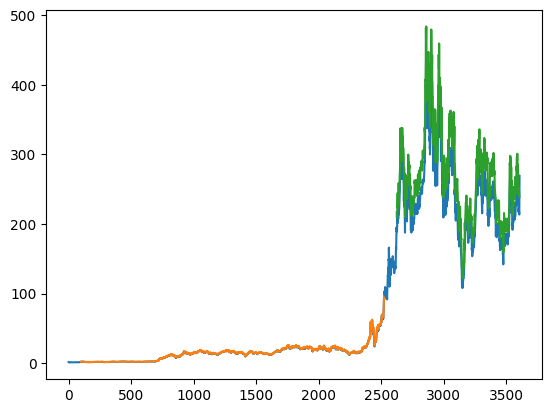

In [155]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(sc.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### Predicting the future 100 days output

In [156]:
train = pd.DataFrame(df[0:int(len(df)*0.70)])
test = pd.DataFrame(df[int(len(df)*0.70): int(len(df))])
train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
2519,2020-07-01,72.199997,75.688667,72.033333,74.641998,74.641998,199903500
2520,2020-07-02,81.431999,81.866669,79.040001,80.577332,80.577332,258751500
2521,2020-07-06,85.112663,91.852669,84.402664,91.438667,91.438667,308548500
2522,2020-07-07,93.667336,95.300003,89.113998,92.657333,92.657333,322345500


In [157]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [158]:
train_close

array([[ 1.59266698],
       [ 1.58866704],
       [ 1.46399999],
       ...,
       [91.4386673 ],
       [92.65733337],
       [91.05867004]])

In [159]:
past_100_days = pd.DataFrame(train_close[-100:])
test_df = pd.DataFrame(test_close)

In [160]:
final_df = pd.concat([test_df, past_100_days], ignore_index = True)
final_df.head()

,0
0,92.952003
1,102.976669
2,99.804001
3,101.120003
4,103.067329


In [161]:
input_data = sc.fit_transform(final_df)
input_data

array([[0.1784729 ],
       [0.20445103],
       [0.19622931],
       ...,
       [0.17455121],
       [0.17770929],
       [0.17356648]])

In [162]:
input_data.shape

(1183, 1)

In [163]:
##Splitting the test set
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [164]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1083, 100, 1)
(1083,)


In [165]:
##Making the predictions
y_pred = model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [166]:
y_pred

array([[0.48886484],
       [0.4683552 ],
       [0.4795934 ],
       ...,
       [0.14908248],
       [0.17641604],
       [0.18514971]], dtype=float32)

In [167]:
y_test

array([0.42789197, 0.4427149 , 0.42894585, ..., 0.17455121, 0.17770929,
       0.17356648])

In [168]:
sc.scale_

array([0.00259142])

In [169]:
scale_factor = 1 / 0.00251232
y_pred = y_pred * scale_factor
y_test = y_test*scale_factor

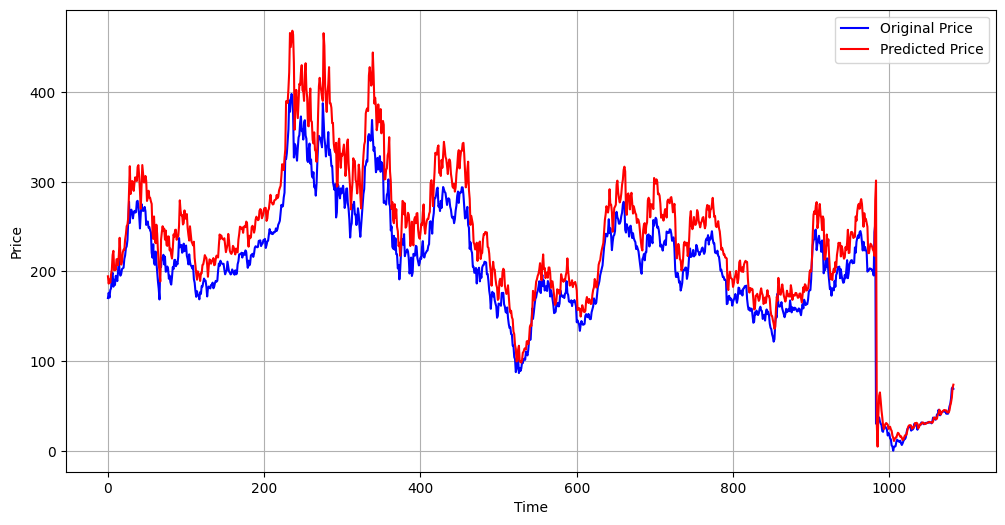

In [170]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [171]:
##Calculating the mean absolute error percentage
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae_percentage = mae / np.mean(y_test) * 100
print(mae_percentage)

14.0347143642522


In [172]:
##Calculating the R2 Score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.8061708828902654


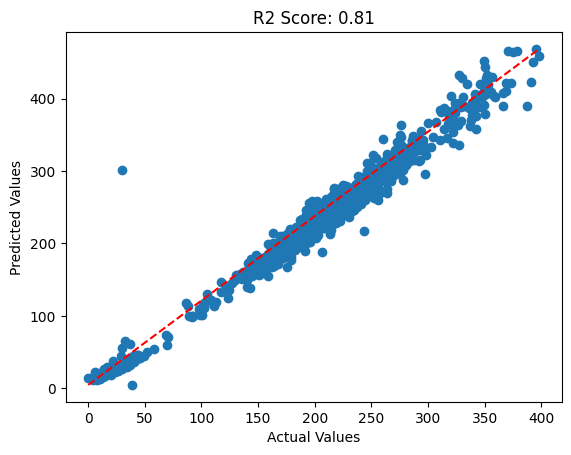

In [173]:
##Plotting the R2 Score graph
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()